## Economic Freedom Index

In this notebook I want to plot the variables "Government Integrity", "Judicial Effectiveness", and "Property Rights" onto a world map.

### Contents of this Notebook
#### 01. Importing libraries
#### 02. Importing dataframe
#### 03. Importing JSON
#### 04. Data checks
#### 05. Data imputation
#### 06. Looking for extreme values
#### 07. Creating a subset for plotting
#### 08. Choropleth with folium

### 01. Importing libraries

In [45]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly as py
import scipy
import folium
import json

In [46]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

### 02. Importing dataframe

In [47]:
df_freedom = pd.read_excel(r'C:\Users\veren\Python Data\Economic Freedom Index\02 Data\Prepared Data\data-economic-freedom-prights-category.xlsx', index_col=False)

### 03. Importing JSON

In [48]:
countries_geo = r'C:\Users\veren\Python Data\Economic Freedom Index\02 Data\Original Data\countries.geo.json'

In [49]:
# Looking at the JSON file contents

f = open(r'C:\Users\veren\Python Data\Economic Freedom Index\02 Data\Original Data\countries.geo.json',)

# returns JSON object as a dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AFG', 'properties': {'name': 'Afghanistan'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[61.210817, 35.650072], [62.230651, 35.270664], [62.984662, 35.404041], [63.193538, 35.857166], [63.982896, 36.007957], [64.546479, 36.312073], [64.746105, 37.111818], [65.588948, 37.305217], [65.745631, 37.661164], [66.217385, 37.39379], [66.518607, 37.362784], [67.075782, 37.356144], [67.83, 37.144994], [68.135562, 37.023115], [68.859446, 37.344336], [69.196273, 37.151144], [69.518785, 37.608997], [70.116578, 37.588223], [70.270574, 37.735165], [70.376304, 38.138396], [70.806821, 38.486282], [71.348131, 38.258905], [71.239404, 37.953265], [71.541918, 37.905774], [71.448693, 37.065645], [71.844638, 36.738171], [72.193041, 36.948288], [72.63689, 37.047558], [73.260056, 37.495257], [73.948696, 37.421566], [74.980002, 37.41999], [75.158028, 37.133031], [74.575893, 37.020841], [74.067552, 36.836176], [72.920025, 36.720007], [71.846292, 36.509942], [71.262348, 36.074388]

### 04. Data checks

In [50]:
df_freedom.shape

(5152, 19)

In [51]:
df_freedom.columns

Index(['Unnamed: 0', 'Name', 'Latitude', 'Longitude', 'Index Year',
       'Overall Score', 'Property Rights', 'Government Integrity',
       'Judicial Effectiveness', 'Tax Burden', 'Government Spending',
       'Fiscal Health', 'Business Freedom', 'Labor Freedom',
       'Monetary Freedom', 'Trade Freedom', 'Investment Freedom',
       'Financial Freedom', 'Property Rights Category'],
      dtype='object')

In [52]:
df_freedom.head()

,Unnamed: 0,Name,Latitude,Longitude,Index Year,Overall Score,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Property Rights Category
0,0,Afghanistan,33.939110,67.709953,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Albania,41.153332,20.168331,2022,66.6,55.5,35.6,49.8,89.1,72.1,70.6,70.7,51.1,82.0,82.6,70.0,70.0,Medium Score
2,2,Algeria,28.033886,1.659626,2022,45.8,27.9,30.1,29.7,67.2,57.1,38.6,50.0,51.5,80.1,57.4,30.0,30.0,Low Score
3,3,Angola,-11.202692,17.873887,2022,52.6,39.8,20.6,25.3,86.6,86.4,80.0,37.6,53.9,61.2,70.0,30.0,40.0,Low Score
4,4,Argentina,-38.416097,-63.616672,2022,50.1,35.1,45.1,57.9,73.3,53.0,16.8,55.1,51.0,37.9,60.6,55.0,60.0,Low Score


In [53]:
# Dropping the index column (I had imported the dataframe without an index column, but must have accidentally exported it with an index column in script no 02)

df_freedom.drop(df_freedom.columns[0], axis=1, inplace =True)

In [54]:
df_freedom.head()

,Name,Latitude,Longitude,Index Year,Overall Score,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Property Rights Category
0,Afghanistan,33.939110,67.709953,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,41.153332,20.168331,2022,66.6,55.5,35.6,49.8,89.1,72.1,70.6,70.7,51.1,82.0,82.6,70.0,70.0,Medium Score
2,Algeria,28.033886,1.659626,2022,45.8,27.9,30.1,29.7,67.2,57.1,38.6,50.0,51.5,80.1,57.4,30.0,30.0,Low Score
3,Angola,-11.202692,17.873887,2022,52.6,39.8,20.6,25.3,86.6,86.4,80.0,37.6,53.9,61.2,70.0,30.0,40.0,Low Score
4,Argentina,-38.416097,-63.616672,2022,50.1,35.1,45.1,57.9,73.3,53.0,16.8,55.1,51.0,37.9,60.6,55.0,60.0,Low Score


In [55]:
# Checking the basic statistics

df_freedom.describe()

,Latitude,Longitude,Index Year,Overall Score,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
count,5152.000000,5152.000000,5152.000000,4618.000000,4655.000000,4671.000000,1099.000000,4634.000000,4650.000000,1092.000000,4667.000000,3173.000000,4656.000000,4641.000000,4656.000000,4634.000000
mean,19.268094,19.108538,2008.543284,59.627891,48.894651,41.144444,46.210828,73.485283,64.597269,66.768223,63.931412,60.241506,72.892955,69.419910,53.643686,49.715149
std,23.880525,65.503617,8.080626,11.711224,23.554082,22.354421,20.957640,15.327823,24.392674,31.065428,16.033107,15.966463,15.333376,15.740793,21.445657,19.857163
min,-40.900557,-175.198242,1995.000000,1.000000,0.000000,0.000000,3.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.454079,-7.375578,2002.000000,53.000000,30.000000,25.500000,30.000000,65.500000,51.000000,49.075000,55.000000,49.900000,69.800000,61.200000,40.000000,30.000000
50%,18.109581,20.939444,2009.000000,59.600000,50.000000,34.600000,43.600000,75.600000,70.650000,78.950000,64.800000,60.200000,76.300000,72.200000,50.000000,50.000000
75%,39.399872,50.637772,2016.000000,67.400000,70.000000,52.000000,60.000000,83.400000,84.100000,92.125000,73.300000,71.200000,81.300000,80.800000,70.000000,70.000000
max,64.963051,179.414413,2022.000000,90.500000,100.000000,100.000000,98.000000,100.000000,99.300000,100.000000,100.000000,100.000000,95.400000,95.000000,95.000000,90.000000


In [56]:
# Checking for missing values

df_freedom.isnull().sum()

Name                           0
Latitude                       0
Longitude                      0
Index Year                     0
Overall Score                534
Property Rights              497
Government Integrity         481
Judicial Effectiveness      4053
Tax Burden                   518
Government Spending          502
Fiscal Health               4060
Business Freedom             485
Labor Freedom               1979
Monetary Freedom             496
Trade Freedom                511
Investment Freedom           496
Financial Freedom            518
Property Rights Category     905
dtype: int64

In [57]:
# Trying to find out the percentage of missing data for the relevant columns in order to decide if to impute them 
# "Overall score"

534 / 5152 * 100

10.364906832298136

10.4% of missing values of "Overall Score" should be imputed with the median because the variation between the min and max values is high. 

In [58]:
# Government Integrity
481 / 5152 * 100

9.336180124223603

9.3% of missing values for "Government Integrity" should be imputed with the median because the variation between the min and max values is high.

In [59]:
# Judicial Effectiveness 
4053 / 5152 * 100

78.66847826086956

78.7% of values are missing for "Judicial Effectiveness", so I will disregard this column for the further analysis.

In [60]:
# Property Rights
497 / 5152 * 100

9.646739130434783

9,6% of values are missing for "Property Rights", and they should be imputed with the median because the variation between the min and max values is high.

### 05. Data imputation

In [61]:
# Calculating the median

df_freedom.median()

C:\Users\veren\AppData\Local\Temp\ipykernel_19308\1265260505.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_freedom.median()


Latitude                    18.109581
Longitude                   20.939444
Index Year                2009.000000
Overall Score               59.600000
Property Rights             50.000000
Government Integrity        34.600000
Judicial Effectiveness      43.600000
Tax Burden                  75.600000
Government Spending         70.650000
Fiscal Health               78.950000
Business Freedom            64.800000
Labor Freedom               60.200000
Monetary Freedom            76.300000
Trade Freedom               72.200000
Investment Freedom          50.000000
Financial Freedom           50.000000
dtype: float64

In [62]:
# Adding median values to columns with missing values that I want to use further
# Overall score

df_freedom['Overall Score'].fillna(df_freedom['Overall Score'].median(), inplace=True)

In [63]:
# Property Rights

df_freedom['Property Rights'].fillna(df_freedom['Property Rights'].median(), inplace=True)

In [64]:
# Government Integrity

df_freedom['Government Integrity'].fillna(df_freedom['Government Integrity'].median(), inplace=True)

In [65]:
# Re-checking missing values 

df_freedom.isnull().sum()

Name                           0
Latitude                       0
Longitude                      0
Index Year                     0
Overall Score                  0
Property Rights                0
Government Integrity           0
Judicial Effectiveness      4053
Tax Burden                   518
Government Spending          502
Fiscal Health               4060
Business Freedom             485
Labor Freedom               1979
Monetary Freedom             496
Trade Freedom                511
Investment Freedom           496
Financial Freedom            518
Property Rights Category     905
dtype: int64

### 06. Looking for extreme values

<AxesSubplot:xlabel='Overall Score', ylabel='Count'>

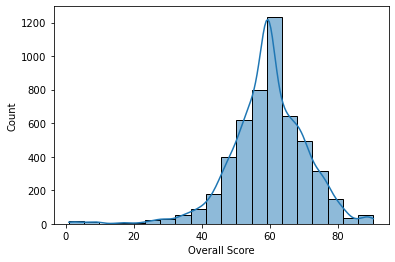

In [66]:
sns.histplot(df_freedom['Overall Score'], bins = 20, kde = True) 

<AxesSubplot:xlabel='Government Integrity', ylabel='Count'>

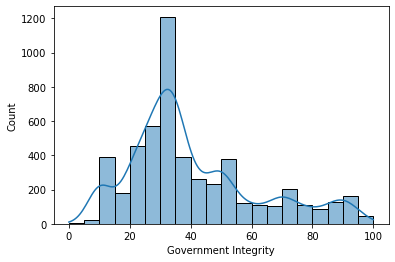

In [67]:
sns.histplot(df_freedom['Government Integrity'], bins = 20, kde = True) 

<AxesSubplot:xlabel='Judicial Effectiveness', ylabel='Count'>

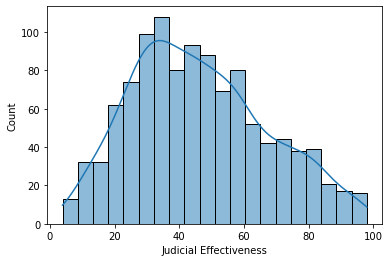

In [68]:
sns.histplot(df_freedom['Judicial Effectiveness'], bins = 20, kde = True) 

### 07. Creating a subset for plotting

In [69]:
data_to_plot = df_freedom[['Name','Overall Score']]

In [70]:
data_to_plot 

,Name,Overall Score
0,Afghanistan,59.6
1,Albania,66.6
2,Algeria,45.8
3,Angola,52.6
4,Argentina,50.1
...,...,...
5147,Venezuela,59.8
5148,Vietnam,41.7
5149,Yemen,49.8
5150,Zambia,55.1


### 08. Choropleth with folium

In [75]:
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = countries_geo, 
    data = data_to_plot,
    columns = ['Name', 'Overall Score'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=1.0, line_opacity=1.0,
    legend_name = "Score").add_to(map)

folium.LayerControl().add_to(map)

In [76]:
map